# Pediatric Sepsis: In-hospital Mortality Prediction

### Importing Necessary Libraries

In [428]:
import pandas as pd
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import OrdinalEncoder


### Importing the dataset

In [429]:
sepsis_df=pd.read_csv("./SyntheticData_Training.csv")
sepsis_df

,studyid_adm,agecalc_adm,height_cm_adm,weight_kg_adm,muac_mm_adm,hr_bpm_adm,rr_brpm_app_adm,sysbp_mmhg_adm,diasbp_mmhg_adm,temp_c_adm,...,cookloc_adm,lightfuel_adm,tobacco_adm,bednet_adm,hctpretransfusion_adm,hivstatus_adm,malariastatuspos_adm,lengthadm,caregiver_adm_new,inhospital_mortality
0,1,16.8,79.80,11.600,150.0,130.0,23.0,92.0,54.0,36.3,...,In a separate building/building space used as ...,Electric bulbs (national grid),Never,Always,Yes,HIV negative,No,2,Mother,0
1,2,46.1,93.00,13.600,151.0,115.0,35.0,72.0,42.0,36.8,...,In a separate building/building space used as ...,Tadooba,Never,Always,Yes,HIV negative,Yes,5,Mother,0
2,3,7.9,68.20,8.200,148.0,150.0,56.0,94.0,51.0,37.2,...,In a separate building/building space used as ...,Tadooba,Never,Always,Yes,HIV negative,No,4,Mother,0
3,4,38.2,95.00,12.000,138.0,134.0,38.0,94.0,57.0,37.6,...,In the house where you sleep,Electric bulbs (national grid),Never,Always,NaN,HIV negative,Yes,5,Mother,0
4,5,16.1,83.00,12.000,165.0,163.0,61.0,107.0,73.0,38.7,...,Outdoors in the open,Electric bulbs (national grid),Never,Sometimes,Yes,HIV negative,Yes,7,Mother,0
5,6,29.6,84.00,10.000,138.0,128.0,49.0,95.0,46.0,38.3,...,In a separate building/building space used as ...,Electric bulbs (national grid),Never,Always,Yes,HIV negative,No,3,Grandparent,0
6,7,45.1,102.20,11.000,145.0,128.0,35.0,75.0,37.0,39.0,...,In a separate building/building space used as ...,Solar powered bulbs,Never,Always,Yes,HIV negative,No,1,Mother,0
7,8,6.7,65.00,7.800,160.0,173.0,70.0,120.0,60.0,36.9,...,Outdoors in the open,Solar powered bulbs,Never,Always,Yes,HIV negative,No,2,Mother,0
8,9,10.7,65.00,5.900,118.0,132.0,45.0,104.0,66.0,36.8,...,In a separate building/building space used as ...,Tadooba,Never,Always,Yes,HIV negative,No,13,Mother,0
9,10,32.3,83.10,11.640,161.0,135.0,40.0,108.0,73.0,37.2,...,Outdoors in the open,Tadooba,Never,Always,No,HIV negative,No,2,Grandparent,0


### Dataset Structure

In [430]:
sepsis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2686 entries, 0 to 2685
Columns: 138 entries, studyid_adm to inhospital_mortality
dtypes: float64(23), int64(3), object(112)
memory usage: 2.8+ MB


### Statistical Summary

In [431]:
#Create a summary DataFrame of column characteristics

column_summary= pd.DataFrame({'Column': sepsis_df.columns, 
                              'Data Type': sepsis_df.dtypes.values,
                              'Missing Values': sepsis_df.isnull().sum().values,
                              'Missing %': (sepsis_df.isnull().mean() * 100).values,
                              'Unique Values': sepsis_df.nunique().values})



# Display all rows in the column summary
#pd.set_option('display.max_rows', None)

# Print
print(column_summary)

                       Column Data Type  Missing Values  Missing %  \
0                 studyid_adm     int64               0   0.000000   
1                 agecalc_adm   float64               0   0.000000   
2               height_cm_adm   float64              14   0.521221   
3               weight_kg_adm   float64               9   0.335071   
4                 muac_mm_adm   float64              13   0.483991   
5                  hr_bpm_adm   float64               1   0.037230   
6             rr_brpm_app_adm   float64               5   0.186150   
7              sysbp_mmhg_adm   float64               2   0.074460   
8             diasbp_mmhg_adm   float64               1   0.037230   
9                  temp_c_adm   float64               1   0.037230   
10       spo2site1_pc_oxi_adm   float64               4   0.148920   
11       spo2site2_pc_oxi_adm   float64             205   7.632167   
12              spo2other_adm   float64            2505  93.261355   
13                 m

Getting basic statistical descriptions for numerical features.

## Data Cleaning

### Checking Missing Values

In [432]:
#pd.set_option('display.max_rows', None)
sepsis_df.isnull().sum()


studyid_adm                    0
agecalc_adm                    0
height_cm_adm                 14
weight_kg_adm                  9
muac_mm_adm                   13
hr_bpm_adm                     1
rr_brpm_app_adm                5
sysbp_mmhg_adm                 2
diasbp_mmhg_adm                1
temp_c_adm                     1
spo2site1_pc_oxi_adm           4
spo2site2_pc_oxi_adm         205
spo2other_adm               2505
momage_adm                    19
momagefirstpreg_adm          224
householdsize_adm              3
alivechildren_adm              4
deadchildren_adm               1
hematocrit_gpdl_adm          457
lactate_mmolpl_adm           464
lactate2_mmolpl_adm         2217
glucose_mmolpl_adm             9
sqi1_perc_oxi_adm            130
sqi2_perc_oxi_adm            207
sex_adm                        0
spo2onoxy_adm                  4
oxygenavail_adm                0
respdistress_adm               2
caprefill_adm                  1
bcseye_adm                     1
bcsmotor_a

### Dropping columns

#### Dropping intervention columns

In [433]:
cols_to_drop = [col for col in sepsis_df.columns if col.startswith('admitabx_')]
sepsis_df= sepsis_df.drop(columns=cols_to_drop)

The intervention columns were dropped because they represent actions taken after the patient's admission or during treatment. Including these columns could lead to data leakage, allowing the model to use information that would not be available at the time of prediction. This would result in an overfitted model that does not accurately reflect the patient's initial condition.

#### Additional columns to drop

In [434]:
# Dropping columns
sepsis_df.drop(columns=["spo2other_adm","vaccmeaslessource_adm","lactate2_mmolpl_adm","nonexclbreastfed_adm"],inplace=True)

#### Justification for dropping
___
* **"spo2other\_adm" dropped:** Represents oxygen saturation with another device (redundant), and has 93.3% missing values.
* **"lactate2\_mmolpl\_adm" dropped:** A similar measurement is available, and it has 82.54% missing values.
* **"nonexclbreastfed\_adm" dropped:** Represents non-exclusive breastfeeding details, with 96.91% missing values.
* **"vaccmeaslessource\_adm" dropped:** Represents the source of information regarding measles vaccination (found to be less important), with 35.22% missing values.
___

### Imputing Missing Values

#### Imputing Numeric Columns

In [435]:
# Step 1: Get columns that have at least one missing value
cols_with_missing = sepsis_df.columns[sepsis_df.isnull().any()].tolist()

# Step 2: Create a new DataFrame with only those columns
df_missing_subset = sepsis_df[cols_with_missing]

##### Checking distribution of columns with missing values

In [436]:
# Step 1: Select numeric columns only
numeric_cols = df_missing_subset.select_dtypes(include='number')

# Step 2: Calculate skewness for each numeric column
skewness = numeric_cols.skew()

# Step 3: Filter columns where skewness is between -0.5 and +0.5
symmetric_cols = skewness[(skewness > -0.5) & (skewness < 0.5)].index.tolist()

print("Columns with fairly symmetric distributions:", symmetric_cols)

Columns with fairly symmetric distributions: ['muac_mm_adm', 'sysbp_mmhg_adm', 'diasbp_mmhg_adm', 'hematocrit_gpdl_adm']


___
Columns with fairly symmetric distributions (skewness between -0.5 and 0.5) were identified using the `.skew()` function and separated for imputation using the **mean**. For columns with more skewed distributions (skewness < -0.5 or > 0.5), the **median** will be used instead, as it's more robust to outliers.
___

#### Imputing the columns with fairly symmetric distributions using mean

In [437]:
sepsis_df[['sysbp_mmhg_adm', 'diasbp_mmhg_adm']] = sepsis_df[['sysbp_mmhg_adm', 'diasbp_mmhg_adm']].fillna(sepsis_df[['sysbp_mmhg_adm', 'diasbp_mmhg_adm']].mean())
#sepsis_df['shockindex_heart_rate_sbp_adm'] = sepsis_df['shockindex_heart_rate_sbp_adm'].fillna(sepsis_df['shockindex_heart_rate_sbp_adm'].mean())

#### Imputing Height

In [438]:
# Loading the WHO dataset for girls
who_girls = pd.read_csv("./girls_length_height_for_age.csv")

# Round age to match WHO months
sepsis_df['age_months_rounded'] = sepsis_df['agecalc_adm'].round().astype(int)

# Prepare WHO data
who_clean = who_girls[['Months', 'Median']].rename(columns={
    'Months': 'age_months_rounded',
    'Median': 'who_median_height'
})

# Merge on the rounded age
sepsis_df = sepsis_df.merge(
    who_clean,
    on='age_months_rounded',
    how='left',
    suffixes=('', '_who')  # Adding a suffix '_who' to differentiate the columns
)

# Identify missing heights for female patients
girls_mask = (sepsis_df['sex_adm'] == 'Female') & (sepsis_df['height_cm_adm'].isna())

# Impute with WHO median height based on rounded age
sepsis_df.loc[girls_mask, 'height_cm_adm'] = sepsis_df.loc[girls_mask, 'who_median_height']

# Loading the WHO dataset for boys
who_boys = pd.read_csv("./boys_length_height_for_age.csv")

# Round age to match WHO months
sepsis_df['age_months_rounded'] = sepsis_df['agecalc_adm'].round().astype(int)

# Prepare WHO data
who_clean_boys = who_boys[['Months', 'Median']].rename(columns={
    'Months': 'age_months_rounded',
    'Median': 'who_median_height_boys'
})

# Merge on the rounded age
sepsis_df = sepsis_df.merge(
    who_clean_boys,
    on='age_months_rounded',
    how='left',
    suffixes=('', '_who')  # Adding a suffix '_who' to differentiate the columns
)

# Identify missing heights for male patients
boys_mask = (sepsis_df['sex_adm'] == 'Male') & (sepsis_df['height_cm_adm'].isna())

# Impute with WHO median height based on rounded age for boys
sepsis_df.loc[boys_mask, 'height_cm_adm'] = sepsis_df.loc[boys_mask, 'who_median_height_boys']

# Check for missing values again
sepsis_df['height_cm_adm'].isna().sum()

# Load WHO data
boys_wfa = pd.read_csv("./boys_weight_for_age.csv")  
girls_wfa = pd.read_csv("./girls_weight_for_age.csv") 

# Round the age to the nearest integer
sepsis_df['agecalc_adm_rounded'] = sepsis_df['agecalc_adm'].round().astype(int)



___
'height_cm_adm' Missing height values were imputed using WHO median height-for-age data, separately for males and females. Age in months was rounded to align with WHO reference tables.
___

#### Imputing Weight

In [439]:
# Function to impute missing weight values
def impute_weight(row):
    if pd.isna(row['weight_kg_adm']):
        if row['sex_adm'] == 'Male':
            # Get the median weight for boys based on the agecalc_adm
            ref = boys_wfa[boys_wfa['Months'] == row['agecalc_adm_rounded']]['Median'].values[0]
        else:
            # Get the median weight for girls based on the agecalc_adm
            ref = girls_wfa[girls_wfa['Months'] == row['agecalc_adm_rounded']]['Median'].values[0]
        return ref
    return row['weight_kg_adm']

# Apply the imputation to the dataset
sepsis_df['weight_kg_adm'] = sepsis_df.apply(impute_weight, axis=1)

# Check for missing values again
sepsis_df['weight_kg_adm'].isna().sum()

np.int64(0)

___
**'weight\_kg\_adm'** Missing weight values were imputed using WHO median weight-for-age data, separately for males and females. Age in months was rounded to match the WHO reference tables.
___

#### MUAC imputation based on age

In [440]:
# Loading the WHO dataset for girls
who_girls = pd.read_csv("./acfa-girls-3-5-zscores.csv")

# Round age to match WHO months
sepsis_df['age_months_rounded'] = sepsis_df['agecalc_adm'].round().astype(int)

# Prepare WHO data
who_clean = who_girls[['Month', 'SD0']].rename(columns={
    'Month': 'age_months_rounded',
    'SD0': 'who_median_muac'
})

# Merge on the rounded age
sepsis_df = sepsis_df.merge(
    who_clean,
    on='age_months_rounded',
    how='left',
    suffixes=('', '_who')  # Adding a suffix '_who' to differentiate the columns
)

# Identify missing muac for female patients
girls_mask = (sepsis_df['sex_adm'] == 'Female') & (sepsis_df['muac_mm_adm'].isna())

# Impute with WHO median muac based on rounded age
sepsis_df.loc[girls_mask, 'muac_mm_adm'] = sepsis_df.loc[girls_mask, 'who_median_muac']

# Loading the WHO dataset for boys
who_boys = pd.read_csv("./acfa-boys-3-5-zscores.csv")

# Round age to match WHO months
sepsis_df['age_months_rounded'] = sepsis_df['agecalc_adm'].round().astype(int)

# Prepare WHO data
who_clean_boys = who_boys[['Month', 'SD0']].rename(columns={
    'Month': 'age_months_rounded',
    'SD0': 'who_median_muac'
})

# Merge on the rounded age
sepsis_df = sepsis_df.merge(
    who_clean_boys,
    on='age_months_rounded',
    how='left',
    suffixes=('', '_who')  # Adding a suffix '_who' to differentiate the columns
)

# Identify missing heights for male patients
boys_mask = (sepsis_df['sex_adm'] == 'Male') & (sepsis_df['muac_mm_adm'].isna())

# Impute with WHO median height based on rounded age for boys
sepsis_df.loc[boys_mask, 'muac_mm_adm'] = sepsis_df.loc[boys_mask, 'who_median_muac']

# Check for missing values again
sepsis_df['muac_mm_adm'].isna().sum()

np.int64(0)

___
**"muac_mm_adm"** was imputed by grouping the data based on age_group, weight quintiles (weight_group), and sex_adm, then filling missing values with the mean MUAC within each subgroup.
___

#####  Imputing 'hematocrit_gpdl_adm' column

In [441]:

# Step 1: Define the age group bins
def assign_age_group(age_months):
    if age_months < 6:
        return '3-6 month'
    elif age_months < 12:
        return '6-1yr'
    elif age_months < 24:
        return '1-2yr'
    elif age_months < 36:
        return '2-3yr'
    elif age_months < 48:
        return '3-4yr'
    elif age_months < 60:
        return '4-5yr'
    elif age_months < 72:
        return '5-6yr'
    else:
        return 'older'

# Step 2: Create 'age_group' column
sepsis_df['age_group'] = sepsis_df['agecalc_adm'].apply(assign_age_group)

# Step 3: Group by age_group and sex_adm, then impute hematocrit
sepsis_df['hematocrit_gpdl_adm'] = sepsis_df.groupby(['age_group', 'sex_adm'])['hematocrit_gpdl_adm']\
    .transform(lambda x: x.fillna(x.mean()))


___
" hematocrit_gpdl_adm " was imputed using a logical, group-based approach. Since hematocrit levels vary by age and sex, first  patients were categorized into age groups and then grouped the data by both age_group and sex_adm.
Within each group, missing hematocrit values were filled using the mean of that group, ensuring the imputation respects biologically relevant differences.
___

##### Imputing 'lactate_mmolpl_adm' column

In [442]:
# Step 1: Create shock index
sepsis_df['shockindex_heart_rate_sbp_adm'] = sepsis_df['hr_bpm_adm'] / sepsis_df['sysbp_mmhg_adm']

# Step 2: Create high-risk indicator based on SpO2 and shock index
sepsis_df['high_risk'] = ((sepsis_df['spo2site1_pc_oxi_adm'] < 90) | 
                          (sepsis_df['shockindex_heart_rate_sbp_adm'] > 1)).astype(int)

# Step 3: Impute lactate using median within risk groups (only one transform needed)
sepsis_df['lactate_mmolpl_adm'] = sepsis_df.groupby('high_risk')['lactate_mmolpl_adm']\
                                           .transform(lambda x: x.fillna(x.median()))


___
"shockindex_heart_rate_sbp_adm" was created to aid imputation of missing values in the "lactate_mmolpl_adm" column. It was derived from "hr_bpm_adm" and "sysbp_mmhg_adm"  columns. 

* Created a `high_risk` flag for patients with SpO₂ < 90 or shock index > 1.
  These thresholds are clinically meaningful indicators of potential instability.
* Imputed missing `lactate_mmolpl_adm` values using the median within each risk group.
  This ensures imputation is done in a context-sensitive way, preserving group-level distribution patterns.
  
___

##### **Imputing 'spo2site1_pc_oxi_adm' and 'spo2site1_pc_oxi_adm'**

In [443]:
# Use spo2site2 to fill missing values in spo2site1
sepsis_df['spo2site1_pc_oxi_adm'] = sepsis_df['spo2site1_pc_oxi_adm'].fillna(
    sepsis_df['spo2site2_pc_oxi_adm']
)

# Use spo2site1 to fill missing values in spo2site2
sepsis_df['spo2site2_pc_oxi_adm'] = sepsis_df['spo2site2_pc_oxi_adm'].fillna(
    sepsis_df['spo2site1_pc_oxi_adm']
)


##### Checking if we still have missing values

In [444]:
sepsis_df['spo2site1_pc_oxi_adm'].isnull().sum()

np.int64(4)

In [445]:
sepsis_df['spo2site2_pc_oxi_adm'].isnull().sum()

np.int64(4)

##### imputing the missing values 

In [446]:
# Create age group
sepsis_df['age_group2'] = sepsis_df['agecalc_adm'].apply(lambda x: '<1yr' if x < 1 else '≥1yr')

# Impute SpO2 site 1
sepsis_df['spo2site1_pc_oxi_adm'] = sepsis_df.groupby('age_group2')['spo2site1_pc_oxi_adm']\
                                             .transform(lambda x: x.fillna(x.median()))

# Impute SpO2 site 2
sepsis_df['spo2site2_pc_oxi_adm'] = sepsis_df.groupby('age_group2')['spo2site2_pc_oxi_adm']\
                                             .transform(lambda x: x.fillna(x.median()))

___
The columns **'spo2site1\_pc\_oxi\_adm'** and **'spo2site2\_pc\_oxi\_adm'** represent oxygen saturation levels (percentage of hemoglobin carrying oxygen) from two different body sites. Since both measure similar values, **cross imputation** was used to fill missing values. However, 4 missing values were observed, suggesting that 4 rows were missing data for both columns. To account for age-related physiological differences (e.g., respiratory rate, oxygen saturation, heart rate), an **age\_group2** variable was created to categorize patients as <1 year or ≥1 year. Missing SpO₂ values were then imputed using the median within each age group.
___

#### **Imputing 'sqi1_perc_oxi_adm' and 'sqi2_perc_oxi_adm'**

In [447]:
# Step 1: Use cross-SQI imputation
sepsis_df['sqi1_perc_oxi_adm'] = sepsis_df['sqi1_perc_oxi_adm'].fillna(sepsis_df['sqi2_perc_oxi_adm'])
sepsis_df['sqi2_perc_oxi_adm'] = sepsis_df['sqi2_perc_oxi_adm'].fillna(sepsis_df['sqi1_perc_oxi_adm'])

#### Checking if we still have missing values

In [448]:
sepsis_df['sqi1_perc_oxi_adm'].isnull().sum()

np.int64(126)

In [449]:
sepsis_df['sqi2_perc_oxi_adm'].isnull().sum()

np.int64(126)

In [450]:
# Imputing the rest with median
sepsis_df['sqi1_perc_oxi_adm'] = sepsis_df['sqi1_perc_oxi_adm'].fillna(sepsis_df['sqi1_perc_oxi_adm'].median())
sepsis_df['sqi2_perc_oxi_adm'] = sepsis_df['sqi2_perc_oxi_adm'].fillna(sepsis_df['sqi2_perc_oxi_adm'].median())

___
The columns **'sqi1\_perc\_oxi\_adm'** and **'sqi2\_perc\_oxi\_adm'** represent the best and second-best SpO₂ signal quality index at admission. 
* **`sqi1_perc_oxi_adm`** = Highest quality SpO₂ signal among all measured sites at admission.
* **`sqi2_perc_oxi_adm`** = Second-best quality SpO₂ signal from a different site at admission.
Since they are related, **cross-imputation** was applied. However, 126 rows remained missing for both columns, so the remaining missing values were filled using the median.
___

In [451]:
#Create a summary DataFrame of column characteristics

column_summary= pd.DataFrame({'Column': sepsis_df.columns, 
                              'Data Type': sepsis_df.dtypes.values,
                              'Missing Values': sepsis_df.isnull().sum().values,
                              'Missing %': (sepsis_df.isnull().mean() * 100).values,
                              'Unique Values': sepsis_df.nunique().values})
column_summary.sort_values("Missing %")

,Column,Data Type,Missing Values,Missing %,Unique Values
0,studyid_adm,int64,0,0.000000,2686
1,agecalc_adm,float64,0,0.000000,451
2,height_cm_adm,float64,0,0.000000,369
3,weight_kg_adm,float64,0,0.000000,263
4,muac_mm_adm,float64,0,0.000000,108
7,sysbp_mmhg_adm,float64,0,0.000000,80
10,spo2site1_pc_oxi_adm,float64,0,0.000000,42
8,diasbp_mmhg_adm,float64,0,0.000000,76
11,spo2site2_pc_oxi_adm,float64,0,0.000000,39
28,bcsmotor_adm,object,0,0.000000,3


#### **Imputing the columns that do not need logical imputing and have skewed distribution**

In [452]:
# Select numerical columns with missing values
num_cols_with_na = sepsis_df.select_dtypes(include=np.number).columns[sepsis_df.select_dtypes(include=np.number).isna().any()]
# List of columns to exclude
exclude_cols = ['muac_mm_adm', 'sysbp_mmhg_adm', 'diasbp_mmhg_adm', 'hematocrit_gpdl_adm',
                'height_cm_adm', 'weight_kg_adm', 'lactate_mmolpl_adm', 'spo2site1_pc_oxi_adm',
                'spo2site2_pc_oxi_adm', 'sqi1_perc_oxi_adm', 'sqi2_perc_oxi_adm']
# Drop those columns from the list
filtered_num_cols = [col for col in num_cols_with_na if col not in exclude_cols]

# Impute the remaining numerical columns with median
sepsis_df[filtered_num_cols] = sepsis_df[filtered_num_cols].apply(lambda col: col.fillna(col.median()))

#### **Filling Categorical columns**

#### Imputing 'bcseye_adm' and 'bcsverbal_adm'

In [453]:
# Identify rows where 'bcseye_adm' is missing
missing_eye = sepsis_df['bcseye_adm'].isna()

# Print the corresponding 'bcsmotor_adm' and 'bcsverbal_adm' values where 'bcseye_adm' is missing
print(sepsis_df[missing_eye][['bcsmotor_adm', 'bcsverbal_adm']])

# Verifying the exact patient record
patient_1388 = sepsis_df.loc[1388, ['bcseye_adm', 'bcsmotor_adm', 'bcsverbal_adm']]
print(patient_1388)

# Impute missing as "NoFollow" (most severe neurological status)
sepsis_df['bcseye_adm'] = sepsis_df['bcseye_adm'].fillna("Fails to watch or follow")

# Identify rows where 'bcsverbal_adm' (verbal response) is missing
missing_verbal = sepsis_df['bcsverbal_adm'].isna()

# Display corresponding eye and motor responses for those rows
print(sepsis_df[missing_verbal][['bcseye_adm', 'bcsmotor_adm']])

# Filter records with the same eye/motor scores to find the most frequent verbal response
subgroup_mask = (
    (sepsis_df['bcseye_adm'] == 'Watches or follows') & 
    (sepsis_df['bcsmotor_adm'] == 'Withdraws limb from painful stimulus')
)
mode_verbal = sepsis_df[subgroup_mask]['bcsverbal_adm'].mode()[0]  # Most common in this subgroup

# Apply to missing cases
sepsis_df.loc[[507, 1205], 'bcsverbal_adm'] = mode_verbal

                               bcsmotor_adm  \
1388  No response or inappropriate response   

                                          bcsverbal_adm  
1388  Cries appropriately with pain, or, if verbal, ...  
bcseye_adm                                                     NaN
bcsmotor_adm                 No response or inappropriate response
bcsverbal_adm    Cries appropriately with pain, or, if verbal, ...
Name: 1388, dtype: object
              bcseye_adm                          bcsmotor_adm
507   Watches or follows  Withdraws limb from painful stimulus
1205  Watches or follows  Withdraws limb from painful stimulus


___
Missing values in **`bcseye_adm`** were imputed with `"NoFollow"`(worst case).
For **`bcsverbal_adm`**, missing entries were imputed using the **most common value** from a defined subgroup (based on specific eye and motor responses: `"Watches or follows"` and `"Withdraws limb from painful stimulus"`). This approach ensures context-aware imputation.
___

#### Imputing HIV status

In [454]:
sepsis_df['hivstatus_adm'] = sepsis_df['hivstatus_adm'].fillna('NotTested')

___
The column **'hivstatus\_adm'** was imputed with **'NotTested'** since it was challenging to reliably estimate the missing values using the same or related columns.
___

#### Imputing hctpretransfusion_adm


Text(0.5, 1.0, 'Boxplot of Hematocrit by Pre-Transfusion Status')

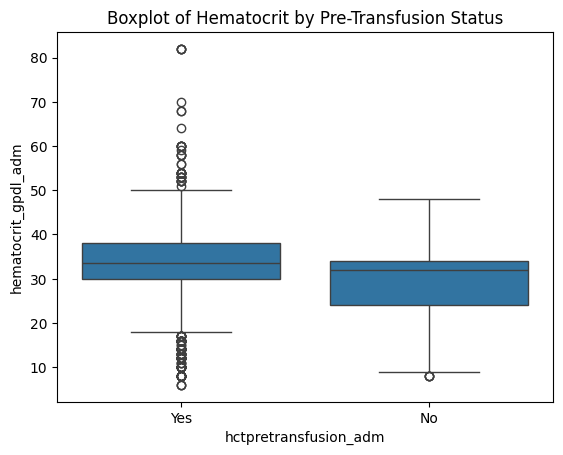

In [455]:
sns.boxplot(sepsis_df,x="hctpretransfusion_adm",y="hematocrit_gpdl_adm")
plt.title("Boxplot of Hematocrit by Pre-Transfusion Status")

In [456]:
# First, calculate mode (most frequent value)
mode_value = sepsis_df['hctpretransfusion_adm'].mode()[0]

# Define custom function
def impute_hctpretransfusion(row):
    if pd.isna(row['hctpretransfusion_adm']):
        if row['hematocrit_gpdl_adm'] < 10 or row['hematocrit_gpdl_adm'] > 50:
            return 'Yes'
        else:
            return mode_value
    else:
        return row['hctpretransfusion_adm']

# Apply the function to fill missing values
sepsis_df['hctpretransfusion_adm'] = sepsis_df.apply(impute_hctpretransfusion,axis=1)

___
**"hctpretransfusion\_adm"** was imputed using a **distribution-based method** guided by a box plot analysis. Since the upper whisker for “No” responses was around 50 and the lower whisker around 10 (based on hematocrit values), missing entries with hematocrit values outside this range were classified as **"Yes"**. The remaining missing values were filled using the **mode**.
___


#### Imputing the columns that do not need logical imputing with mode

In [457]:
# List of categorical columns to exclude from imputation
exclude_cat_cols = ['bcseye_adm', 'bcsverbal_adm', 'hivstatus_adm', 'hctpretransfusion_adm']

# Select categorical columns with missing values
cat_cols_with_na = [col for col in sepsis_df.select_dtypes(include='object').columns 
                    if sepsis_df[col].isna().sum() > 0]

# Drop excluded columns
filtered_cat_cols = [col for col in cat_cols_with_na if col not in exclude_cat_cols]

# Impute remaining categorical columns with mode
for col in filtered_cat_cols:
    mode_val = sepsis_df[col].mode(dropna=True)[0]
    sepsis_df[col] = sepsis_df[col].fillna(mode_val)


#### Checking for missing values again

In [458]:
sepsis_df.isnull().sum()

studyid_adm                      0
agecalc_adm                      0
height_cm_adm                    0
weight_kg_adm                    0
muac_mm_adm                      0
hr_bpm_adm                       0
rr_brpm_app_adm                  0
sysbp_mmhg_adm                   0
diasbp_mmhg_adm                  0
temp_c_adm                       0
spo2site1_pc_oxi_adm             0
spo2site2_pc_oxi_adm             0
momage_adm                       0
momagefirstpreg_adm              0
householdsize_adm                0
alivechildren_adm                0
deadchildren_adm                 0
hematocrit_gpdl_adm              0
lactate_mmolpl_adm               0
glucose_mmolpl_adm               0
sqi1_perc_oxi_adm                0
sqi2_perc_oxi_adm                0
sex_adm                          0
spo2onoxy_adm                    0
oxygenavail_adm                  0
respdistress_adm                 0
caprefill_adm                    0
bcseye_adm                       0
bcsmotor_adm        

No missing values observed

In [459]:
#sepsis_df.to_csv("sepsis_cleaned.csv", index=False)


#### Dropping columns that were added for the sake of data cleaning

In [460]:
sepsis_df.columns.get_loc('inhospital_mortality')
sepsis_df = sepsis_df.drop(sepsis_df.columns[113:], axis=1)

The above code drops all the columns that were added for the purpose of data  cleaning.

### Hypothesis Testing

To better understand which features are potentially associated with **in-hospital mortality**, we performed hypothesis testing for both **categorical** and **continuous** variables. This helps us identify variables that exhibit statistically significant differences between patients who **survived (0)** and those who **died (1)** during hospitalization.

---

#### Categorical Features – Chi-Square Test of Independence

This test evaluates whether there is a significant association between each categorical variable and the target outcome.

- **Null Hypothesis (H₀):** There is no association between the categorical feature and in-hospital mortality.  
- **Alternative Hypothesis (H₁):** There is a significant association between the categorical feature and in-hospital mortality.

---

#### Continuous Features – Mann-Whitney U Test

This non-parametric test is used to compare the distributions of two independent groups. It is preferred here due to the likely non-normal distribution of clinical measurements.

- **Null Hypothesis (H₀):** The distributions of the continuous variable are equal for survivors and non-survivors.  
- **Alternative Hypothesis (H₁):** The distributions of the continuous variable differ between survivors and non-survivors.

---

By identifying features with **low p-values** (typically **p < 0.01**), we can prioritize them in downstream modeling, as they may hold predictive value for mortality outcomes.



In [461]:
# Separate the target
target = 'inhospital_mortality'

# 1. Identify categorical and continuous features (excluding target)
categorical_features = sepsis_df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()
continuous_features = sepsis_df.select_dtypes(include=['int64', 'float64']).drop(columns=[target]).columns.tolist()

# 2. Chi-square test for categorical features
print("\n--- Chi-Square Test Results ---")
for col in categorical_features:
    contingency_table = pd.crosstab(sepsis_df[col], sepsis_df[target])
    if contingency_table.shape[0] > 1:
        chi2, p, dof, _ = stats.chi2_contingency(contingency_table)
        print(f"{col}: p-value = {p:.4f}")

# 3. Mann-Whitney U Test for continuous features (non-parametric)
print("\n--- Mann-Whitney U Test Results ---")
for col in continuous_features:
    survived = sepsis_df[sepsis_df[target] == 0][col]
    died = sepsis_df[sepsis_df[target] == 1][col]
    u_stat, p_value = stats.mannwhitneyu(survived, died, alternative='two-sided')
    print(f"{col}: p-value = {p_value:.4f}")



--- Chi-Square Test Results ---
sex_adm: p-value = 0.5463
spo2onoxy_adm: p-value = 0.0000
oxygenavail_adm: p-value = 0.0000
respdistress_adm: p-value = 0.0002
caprefill_adm: p-value = 0.0064
bcseye_adm: p-value = 0.0000
bcsmotor_adm: p-value = 0.0000
bcsverbal_adm: p-value = 0.0000
bcgscar_adm: p-value = 0.0002
vaccmeasles_adm: p-value = 0.8093
vaccpneumoc_adm: p-value = 0.0492
vaccpneumocsource_adm: p-value = 0.9819
vaccdpt_adm: p-value = 0.0303
vaccdptsource_adm: p-value = 0.7855
priorweekabx_adm: p-value = 0.9838
priorweekantimal_adm: p-value = 0.7438
symptoms_adm___1: p-value = 0.8541
symptoms_adm___2: p-value = 0.0919
symptoms_adm___3: p-value = 0.0365
symptoms_adm___4: p-value = 0.1887
symptoms_adm___5: p-value = 0.9805
symptoms_adm___6: p-value = 0.7932
symptoms_adm___7: p-value = 0.3056
symptoms_adm___8: p-value = 0.6099
symptoms_adm___9: p-value = 0.6950
symptoms_adm___10: p-value = 0.7872
symptoms_adm___11: p-value = 0.7196
symptoms_adm___12: p-value = 0.5825
symptoms_adm___

#### Identifying Significant Columns based on p values

In [7]:
import pandas as pd
import scipy.stats as stats

# 1. Separate categorical and continuous features
target = 'inhospital_mortality'
categorical_features = sepsis_df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()
continuous_features = sepsis_df.select_dtypes(include=['int64', 'float64']).drop(columns=[target]).columns.tolist()

# 2. Chi-Square test for categorical features
significant_cat = []
for col in categorical_features:
    contingency = pd.crosstab(sepsis_df[col], sepsis_df[target])
    if contingency.shape[0] > 1:
        chi2, p, _, _ = stats.chi2_contingency(contingency)
        if p < 0.01:
            significant_cat.append(col)

# 3. Mann-Whitney U Test for continuous features
significant_cont = []
for col in continuous_features:
    group0 = sepsis_df[sepsis_df[target] == 0][col]
    group1 = sepsis_df[sepsis_df[target] == 1][col]
    try:
        u_stat, p_value = stats.mannwhitneyu(group0, group1, alternative='two-sided')
        if p_value < 0.01:
            significant_cont.append(col)
    except:
        pass  # Skip if error due to too many NaNs or invalid inputs

# 4. Combine and review
significant_features = significant_cat + significant_cont
print(f"Total significant features (p < 0.01): {len(significant_features)}")
print(significant_features)


NameError: name 'sepsis_df' is not defined

___
After applying the Chi Square and Mann-Whitney U Test the following columns appeared as significant columns:

*Categorical Variables*
- 'spo2onoxy_adm'
- 'oxygenavail_adm'
- 'respdistress_adm'
- 'caprefill_adm'
- 'bcseye_adm'
- 'bcsmotor_adm'
- 'bcsverbal_adm'
- 'bcgscar_adm'
- 'symptoms_adm___14'
- 'symptoms_adm___15'
- 'diarrheaoften_adm'
- 'feedingstatus_adm'
- 'totalbreastfed_adm'
- 'caregivermarried_adm'
- 'waterpure_adm'
- 'bednet_adm'
- 'hctpretransfusion_adm'

 *Numerical Variables*
- 'weight_kg_adm'
- 'muac_mm_adm'
- 'lactate_mmolpl_adm'


### **Encoding Categorical Variables**

#### Identifying Categorical Variables

In [463]:
# Identify categorical columns
categorical_cols = sepsis_df.select_dtypes(include='object').columns

# Count unique values in each categorical column
cat_unique_counts = sepsis_df[categorical_cols].nunique().sort_values()

# Create a summary DataFrame
cat_summary = pd.DataFrame({
    'Categorical Variable': cat_unique_counts.index,
    'Unique Values Count': cat_unique_counts.values
})

# Display all rows
pd.set_option('display.max_rows', None)

# Print the full summary
print(cat_summary)

        Categorical Variable  Unique Values Count
0        comorbidity_adm___4                    1
1          symptoms_adm___18                    1
2                    sex_adm                    2
3              spo2onoxy_adm                    2
4                 bcseye_adm                    2
5          vaccdptsource_adm                    2
6           respdistress_adm                    2
7              caprefill_adm                    2
8           symptoms_adm___8                    2
9           symptoms_adm___7                    2
10          symptoms_adm___6                    2
11          symptoms_adm___5                    2
12          symptoms_adm___4                    2
13          symptoms_adm___3                    2
14     vaccpneumocsource_adm                    2
15               bcgscar_adm                    2
16          symptoms_adm___9                    2
17         symptoms_adm___10                    2
18         symptoms_adm___11                    2


### Encoding Ordinal Variables

___
*Ordinal encoding* was applied to several categorical columns in the Sepsis_df dataset. The encoding approach was based on assigning integer values in an order that reflects progression from the least favorable to the most favorable condition. The *smallest value (0)* was assigned to the *worst or least desirable condition, while the **largest value* was assigned to the *best or most desirable condition*.

This method was chosen to preserve the inherent ordinal nature of certain variables, ensuring that their *relative severity, quality, or desirability* was maintained in numerical form.

*Encoding Principle:*

> Worst condition → 0
> Best condition → Highest number

After each column was encoded, the original (uncoded) column was subsequently removed from the dataset.


> Categories such as *'Don't know', **'N/A (in care)', **'Unknown', and **'Other'* represent uncertain or ambiguous information. To minimize the risk of *introducing noise* and *overvaluing uncertain data, all such categories were consistently assigned the **lowest ordinal value* during encoding.
___



#### *Creating a copy of the original dataset before encoding*

In [464]:
sepsis_df_original=sepsis_df.copy()

##### **Encoding 'watersource_adm'**

In [465]:
# Define the custom order for water sources
watersource_order = [
    'Open source (unprotected, stagnant water, dam)',
    'Slow running water',
    'Fast running water',
    'Protected spring',
    'Bore hole',
    'Municipal water'
]

# Initialize the OrdinalEncoder with the specified order
encoder = OrdinalEncoder(categories=[watersource_order])

# Reshape and encode the column
sepsis_df['watersource_adm_encoded'] = encoder.fit_transform(
    sepsis_df[['watersource_adm']]
)
#drop the original column
sepsis_df=sepsis_df.drop(columns=["watersource_adm"])
# Optionally view the result
print(sepsis_df['watersource_adm_encoded'].head())


0    5.0
1    3.0
2    4.0
3    5.0
4    5.0
Name: watersource_adm_encoded, dtype: float64


##### **Encoding "vaccpneumoc_adm"**

In [466]:
# Define the custom order for water sources
vaccpneumoc_order = [
    "Unknown",
    '0 doses',
    '1 dose',
    '2 doses',
    '3 doses'    
]

# Initialize the OrdinalEncoder with the specified order
encoder = OrdinalEncoder(categories=[vaccpneumoc_order])

# Reshape and encode the column
sepsis_df['vaccpneumoc_adm_encoded'] = encoder.fit_transform(
    sepsis_df[["vaccpneumoc_adm"]]
)
#drop the original column
sepsis_df=sepsis_df.drop(columns=["vaccpneumoc_adm"])
# Optionally view the result
print(sepsis_df['vaccpneumoc_adm_encoded'].head())


0    4.0
1    3.0
2    4.0
3    4.0
4    4.0
Name: vaccpneumoc_adm_encoded, dtype: float64


"Unknown" is assigned the lowest rank in the ordinal encoding because it represents missing or unverified information. By placing it at the bottom, the model is less likely to interpret it as having clinical significance or progression compared to known vaccination levels.

##### Encoding "vaccdpt_adm"

In [467]:
# Define the custom order for water sources
vaccdpt_order = [
    "Unknown",
    '0 doses',
    '1 dose',
    '2 doses',
    '3 doses'    
]

# Initialize the OrdinalEncoder with the specified order
encoder = OrdinalEncoder(categories=[vaccdpt_order])

# Reshape and encode the column
sepsis_df['vaccdpt_adm_encoded'] = encoder.fit_transform(
    sepsis_df[["vaccdpt_adm"]]
)
#drop the original column
sepsis_df=sepsis_df.drop(columns=["vaccdpt_adm"])
# Optionally view the result
print(sepsis_df['vaccdpt_adm_encoded'].head())


0    4.0
1    3.0
2    4.0
3    4.0
4    4.0
Name: vaccdpt_adm_encoded, dtype: float64


"Unknown" is assigned the lowest rank in the ordinal encoding because it represents missing or unverified information. By placing it at the bottom, the model is less likely to interpret it as having clinical significance or progression compared to known vaccination levels.

##### Encoding "tobacco_adm"

In [468]:
# Define the custom order for water sources
tobacco_order = [
    "Never",
    'Daily',
    'Weekly',
    'Less than monthly',
    'Monthly'    
]

# Initialize the OrdinalEncoder with the specified order
encoder = OrdinalEncoder(categories=[tobacco_order])

# Reshape and encode the column
sepsis_df['tobacco_adm_encoded'] = encoder.fit_transform(
    sepsis_df[['tobacco_adm']]
)
#drop the original column
sepsis_df=sepsis_df.drop(columns=["tobacco_adm"])
# Optionally view the result
print(sepsis_df['tobacco_adm_encoded'].head())


0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: tobacco_adm_encoded, dtype: float64


##### Encoding "traveldist_adm"

In [469]:
# Define the custom order for water sources
traveldist_order = [
    "< 30 minutes",
    '30 minutes - 1 hour',
    '1 - 2 hours',
    '2 - 3 hours',
    '3 - 4 hours',
    "4 - 8 hours",
    "> 8 hours"    
]

# Initialize the OrdinalEncoder with the specified order
encoder = OrdinalEncoder(categories=[traveldist_order])

# Reshape and encode the column
sepsis_df['traveldist_adm_encoded'] = encoder.fit_transform(
    sepsis_df[['traveldist_adm']]
)
#drop the original column
sepsis_df=sepsis_df.drop(columns=["traveldist_adm"])
# Optionally view the result
print(sepsis_df['traveldist_adm_encoded'].head())


0    1.0
1    1.0
2    5.0
3    1.0
4    1.0
Name: traveldist_adm_encoded, dtype: float64


##### Encoding "feedingstatus_adm"

In [470]:
# Define the custom order for water sources
feedingstatus_order = [
    "Not feeding at all",
    'Feeding poorly',
    'Feeding well',
       
]

# Initialize the OrdinalEncoder with the specified order
encoder = OrdinalEncoder(categories=[feedingstatus_order])

# Reshape and encode the column
sepsis_df['feedingstatus_adm_encoded'] = encoder.fit_transform(
    sepsis_df[['feedingstatus_adm']]
)
#drop the original column
sepsis_df=sepsis_df.drop(columns=["feedingstatus_adm"])
# Optionally view the result
print(sepsis_df['feedingstatus_adm_encoded'].head())


0    1.0
1    0.0
2    1.0
3    1.0
4    1.0
Name: feedingstatus_adm_encoded, dtype: float64


##### Encoding "deliveryloc_adm"

In [471]:
# Define the custom order for water sources
deliveryloc_order = [
    "Other",
    'Home',
    'Health centre',
    "Clinic",
    "Hospital"
       
]

# Initialize the OrdinalEncoder with the specified order
encoder = OrdinalEncoder(categories=[deliveryloc_order])

# Reshape and encode the column
sepsis_df['deliveryloc_adm_encoded'] = encoder.fit_transform(
    sepsis_df[['deliveryloc_adm']]
)
#drop the original column
sepsis_df=sepsis_df.drop(columns=["deliveryloc_adm"])
# Optionally view the result
print(sepsis_df['deliveryloc_adm_encoded'].head())


0    2.0
1    4.0
2    4.0
3    4.0
4    4.0
Name: deliveryloc_adm_encoded, dtype: float64


In this case, "Other" is placed at the lowest rank in the ordinal encoding because it typically represents delivery locations that fall outside of standard healthcare settings. These locations are generally less equipped or less formal, and assigning them the lowest rank reflects their lower expected quality or formality of care compared to hospitals, clinics, or health centers.

##### Encoding "birthattend_adm"

In [472]:
# Define the custom order for water sources
birthattend_order = [
    "Other",
    'Relative',
    'Traditional birth attendant',
    "Nurse / midwife",
    "Doctor / Clinical officer"
       
]

# Initialize the OrdinalEncoder with the specified order
encoder = OrdinalEncoder(categories=[birthattend_order])

# Reshape and encode the column
sepsis_df['birthattend_adm_encoded'] = encoder.fit_transform(
    sepsis_df[['birthattend_adm']]
)
#drop the original column
sepsis_df=sepsis_df.drop(columns=["birthattend_adm"])
# Optionally view the result
print(sepsis_df['birthattend_adm_encoded'].head())


0    3.0
1    4.0
2    3.0
3    3.0
4    3.0
Name: birthattend_adm_encoded, dtype: float64


In this encoding, "Other" is assigned the lowest rank because it indicates an undefined or unconventional birth attendant, potentially lacking medical training or standardized care practices. The ranking reflects an ascending order of professional medical expertise and reliability, with "Doctor / Clinical officer" at the top due to their advanced clinical qualifications, which are associated with safer delivery outcomes.

##### Encoding "bcseye_adm"

In [473]:
# Define the custom order for water sources
bcseye_order = [    
    'Fails to watch or follow',
    "Watches or follows"      
]

# Initialize the OrdinalEncoder with the specified order
encoder = OrdinalEncoder(categories=[bcseye_order])

# Reshape and encode the column
sepsis_df['bcseye_adm_encoded'] = encoder.fit_transform(
    sepsis_df[['bcseye_adm']]
)
#drop the original column
sepsis_df=sepsis_df.drop(columns=["bcseye_adm"])
# Optionally view the result
print(sepsis_df['bcseye_adm_encoded'].head())


0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: bcseye_adm_encoded, dtype: float64


##### Encoding "bcsmotor_adm"

In [474]:
# Define the custom order for water sources
bcsmotor_order = [
        'No response or inappropriate response',
        "Localizes painful stimulus",
        "Withdraws limb from painful stimulus"       
]

# Initialize the OrdinalEncoder with the specified order
encoder = OrdinalEncoder(categories=[bcsmotor_order])

# Reshape and encode the column
sepsis_df['bcsmotor_adm_encoded'] = encoder.fit_transform(
    sepsis_df[['bcsmotor_adm']]
)
#drop the original column
sepsis_df=sepsis_df.drop(columns=["bcsmotor_adm"])
# Optionally view the result
print(sepsis_df['bcsmotor_adm_encoded'].head())


0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: bcsmotor_adm_encoded, dtype: float64


#### Encoding 'exclbreastfed_adm'

In [475]:
# Define your order
excl_breastfed_order = [
    'Unknown',
    'never exclusively breastfed',
    '1 month',
    '2 months',
    '3 months',
    '4 months',
    '5 months',
    'Currently exclusively breastfed',
    '6 months',
    'More than 6 months',
]

# Instantiate the encoder with the defined order
encoder = OrdinalEncoder(categories=[excl_breastfed_order])

# Apply encoding
sepsis_df['exclbreastfed_adm_encoded'] = encoder.fit_transform(sepsis_df[['exclbreastfed_adm']])
print(sepsis_df[['exclbreastfed_adm', 'exclbreastfed_adm_encoded']].head())
Sepsis_df=sepsis_df.drop(columns=["exclbreastfed_adm"])

  exclbreastfed_adm  exclbreastfed_adm_encoded
0          6 months                        8.0
1          6 months                        8.0
2          6 months                        8.0
3           Unknown                        0.0
4          6 months                        8.0


___
> **"Currently exclusively breastfed"** was placed just above **"5 months"** in the ordinal scale because the **youngest child admitted in the dataset was 5 months old**. This implies that the **minimum exclusive breastfeeding duration** for this group is at least 5 months, justifying its position above the 5-month category.
___


#### Encoding 'oxygenavail_adm'

In [476]:
# Define the updated logical order from worst to best for oxygen availability
oxygen_order_updated = [
    'Oxygen not available',
    'Oxygen available but not enough',
    'Oxygen available and being used',
    'Oxygen available and not being used'
]

# Initialize the OrdinalEncoder with the specified category order
encoder = OrdinalEncoder(categories=[oxygen_order_updated])

# Apply the encoder to the 'oxygenavail_adm' column and create a new encoded column
sepsis_df['oxygenavail_adm_encoded'] = encoder.fit_transform(sepsis_df[['oxygenavail_adm']])

# Display the original and encoded columns for verification
print(sepsis_df[['oxygenavail_adm', 'oxygenavail_adm_encoded']].head())

# Drop the original (non-encoded) column to clean up the dataset
sepsis_df = sepsis_df.drop(columns=["oxygenavail_adm"])

                       oxygenavail_adm  oxygenavail_adm_encoded
0  Oxygen available and not being used                      3.0
1  Oxygen available and not being used                      3.0
2  Oxygen available and not being used                      3.0
3  Oxygen available and not being used                      3.0
4  Oxygen available and not being used                      3.0


___
> Taking into consideration that oxygen availability is a positive factor, the situation **"Oxygen available and not being used"** was interpreted as more favorable than **"Oxygen available and being used"**. This implies that the child was in better condition and did not require oxygen, despite its availability—indicating a less severe illness.
___

#### Encoding 'bcsverbal_adm'

In [477]:
# Define the logical order (worst → best) for the 'bcsverbal_adm' categories
verbal_order = [
    'No vocal response to pain',
    'Moan or abnormal cry with pain',
    'Cries appropriately with pain, or, if verbal, speaks'
]

encoder = OrdinalEncoder(categories=[verbal_order])

sepsis_df['bcsverbal_adm_encoded'] = encoder.fit_transform(sepsis_df[['bcsverbal_adm']])

# Display the original and encoded columns for verification
print(sepsis_df[['bcsverbal_adm', 'bcsverbal_adm_encoded']].head())

# Drop the original (non-encoded) column to clean up the dataset
sepsis_df = sepsis_df.drop(columns=["bcsverbal_adm"])



                                       bcsverbal_adm  bcsverbal_adm_encoded
0  Cries appropriately with pain, or, if verbal, ...                    2.0
1  Cries appropriately with pain, or, if verbal, ...                    2.0
2  Cries appropriately with pain, or, if verbal, ...                    2.0
3  Cries appropriately with pain, or, if verbal, ...                    2.0
4  Cries appropriately with pain, or, if verbal, ...                    2.0


#### Encoding 'priorhosp_adm'

In [478]:
# Define the logical order (worst → best)
priorhosp_order = [
    'Dont know',
    '> 1 year',
    '1 month - 1 year',
    '7 days - 1 month',
    '< 7 days',
    'Never'
]

encoder = OrdinalEncoder(categories=[priorhosp_order])

sepsis_df['priorhosp_adm_encoded'] = encoder.fit_transform(sepsis_df[['priorhosp_adm']])
# Display the original and encoded columns for verification
print(sepsis_df[['priorhosp_adm', 'priorhosp_adm_encoded']].head())

# Drop the original (non-encoded) column to clean up the dataset
sepsis_df = sepsis_df.drop(columns=["priorhosp_adm"])


      priorhosp_adm  priorhosp_adm_encoded
0             Never                    5.0
1             Never                    5.0
2  1 month - 1 year                    2.0
3  7 days - 1 month                    3.0
4  7 days - 1 month                    3.0


#### Encoding 'totalbreastfed_adm'

In [479]:
# Define the logical order (worst → best)
breastfeeding_order = ['Unknown', '0-3 months','Still being breastfed', '4-6 months', '7-12 months', '>12 months']

# Initialize the OrdinalEncoder with the specified categories
encoder = OrdinalEncoder(categories=[breastfeeding_order])

# Apply the encoding to the 'totalbreastfed_adm' column
sepsis_df['totalbreastfed_adm_encoded'] = encoder.fit_transform(sepsis_df[['totalbreastfed_adm']])
print(sepsis_df[['totalbreastfed_adm', 'totalbreastfed_adm_encoded']].head())

# Drop the original (non-encoded) column to clean up the dataset
sepsis_df = sepsis_df.drop(columns=["totalbreastfed_adm"])



      totalbreastfed_adm  totalbreastfed_adm_encoded
0             >12 months                         5.0
1  Still being breastfed                         2.0
2  Still being breastfed                         2.0
3             >12 months                         5.0
4  Still being breastfed                         2.0


___
> **"Still being breastfed"** was placed just above **'0-3 months'** in the ordinal scale because the **youngest child admitted in the dataset was 5 months old**. While it could be reasonable for this category to fall after **'4-6 months'**, the **uncertainty of the data** regarding the exact breastfeeding duration could introduce noise into the model. As a result, this category was positioned above **'0-3 months'** to avoid overvaluing uncertain data.
___


#### Encoding 'bednet_adm'

In [480]:
# Define the logical order (worst → best)
bednet_order = ['Never', 'Sometimes', 'Always']

# Initialize the OrdinalEncoder with the specified categories
encoder = OrdinalEncoder(categories=[bednet_order])

# Apply the encoding to the 'bednet_adm' column
sepsis_df['bednet_adm_encoded'] = encoder.fit_transform(sepsis_df[['bednet_adm']])
print(sepsis_df[['bednet_adm', 'bednet_adm_encoded']].head())

# Drop the original (non-encoded) column to clean up the dataset
sepsis_df = sepsis_df.drop(columns=["bednet_adm"])



  bednet_adm  bednet_adm_encoded
0     Always                 2.0
1     Always                 2.0
2     Always                 2.0
3     Always                 2.0
4  Sometimes                 1.0


#### Encoding 'badhealthduration_adm'

In [481]:
# Define the corrected logical order
badhealth_order = ['Unknown', '> 1 year', '1 month - 1 year', '1 week - 1 month', '< 1 week', 'In good health prior to this illness']

# Initialize the OrdinalEncoder with the specified categories
encoder = OrdinalEncoder(categories=[badhealth_order])

# Apply the encoding to the 'badhealthduration_adm' column
sepsis_df['badhealthduration_adm_encoded'] = encoder.fit_transform(sepsis_df[['badhealthduration_adm']])
print(sepsis_df[['badhealthduration_adm', 'badhealthduration_adm_encoded']].head())

# Drop the original (non-encoded) column to clean up the dataset
sepsis_df = sepsis_df.drop(columns=["badhealthduration_adm"])



                  badhealthduration_adm  badhealthduration_adm_encoded
0  In good health prior to this illness                            5.0
1  In good health prior to this illness                            5.0
2  In good health prior to this illness                            5.0
3  In good health prior to this illness                            5.0
4                              < 1 week                            4.0


#### Encoding 'caregiverage_adm'

In [482]:
# Define the logical order for the caregiver age
caregiver_age_order = ['N/A (in care)', '< = 18 years old', '> 18 years old', '> 50 years old']

# Initialize the OrdinalEncoder with the specified categories
encoder = OrdinalEncoder(categories=[caregiver_age_order])

# Apply the encoding to the 'caregiverage_adm' column
sepsis_df['caregiverage_adm_encoded'] = encoder.fit_transform(sepsis_df[['caregiverage_adm']])
print(sepsis_df[['caregiverage_adm', 'caregiverage_adm_encoded']].head())

# Drop the original (non-encoded) column to clean up the dataset
sepsis_df = sepsis_df.drop(columns=["caregiverage_adm"])



  caregiverage_adm  caregiverage_adm_encoded
0   > 18 years old                       2.0
1   > 18 years old                       2.0
2   > 18 years old                       2.0
3   > 18 years old                       2.0
4   > 18 years old                       2.0


#### Encoding 'momedu_adm'

In [483]:
# Define the logical order for education level
education_order = ['Dont know','No school',  '< = P3', 'P4-P7', 'S1-S6', 'Post secondary (including post S4 technical school)']

# Initialize the OrdinalEncoder with the specified categories
encoder = OrdinalEncoder(categories=[education_order])

# Apply the encoding to the 'momedu_adm' column
sepsis_df['momedu_adm_encoded'] = encoder.fit_transform(sepsis_df[['momedu_adm']])

print(sepsis_df[['momedu_adm', 'momedu_adm_encoded']].head())

# Drop the original (non-encoded) column to clean up the dataset
sepsis_df = sepsis_df.drop(columns=["momedu_adm"])

                                          momedu_adm  momedu_adm_encoded
0  Post secondary (including post S4 technical sc...                 5.0
1  Post secondary (including post S4 technical sc...                 5.0
2                                              S1-S6                 4.0
3  Post secondary (including post S4 technical sc...                 5.0
4                                              P4-P7                 3.0
